# Statistika Lanjut
## Pengolahan UAS
## Multifactor ANOVA dan Design of Experiment menggunakan 2^K design dengan replikasi

* Faktor : 
    - Jarak End point pada server di seluruh dunia
    - Waktu pengukuran ping
    - Jenis operator yang digunakan

__Jarak Antar Daerah (Level Jarak)__

1. Singtel : Singapore (890 km)
2. Allied Telesis  : Jepang (4262 Km)
3. Ooredoo : Qatar (6930 km)
4. Vodafone      : Italy (6930 km)
5. AT&T  : America (16191  km)

__Waktu pengukuran (Level Waktu)__
1. 10.00 : Waktu mulai peak pekerja indonesia
2. 12.00 : Waktu istirahat pekerja indonesia
3. 14.00 : Waktu peak kedua pekerja indonesia
4. 16.00 : Waktu mendekati pekerja indonesia pulang
5. 18.00 : Waktu istirahat

__Operator yang digunakan (Level operator)__
1. Telkomsel 
2. Indosat
3. XL

## Langkah yang dilakukan untuk penelitian
* Case ANOVA Multifactor
    1. Plot sebaran data
    2. Operasi statistika deskriptif
    3. Operasi ANOVA Multifactor
    4. Plot residual dan model adequacy
    5. Plot interactional
    
* Case 2^K Design of Experiment
    1. Penentuan kondisi maksimum dan minimum
    

In [26]:
# Run Module 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import probscale
import scipy

## Dataframe yang digunakan

In [2]:
# Load Data Download

df = pd.read_csv('2022-05-14-DataStatlan.csv')
df

,jam,jarak,provider,ping
0,10:00,singtel,tsel,70
1,10:00,singtel,tsel,82
2,12:00,singtel,tsel,78
3,12:00,singtel,tsel,72
4,14:00,singtel,tsel,79
...,...,...,...,...
145,14:00,AT&T,xl,290
146,16:00,AT&T,xl,273
147,16:00,AT&T,xl,274
148,18:00,AT&T,xl,266


# Case ANOVA Multifactor

## 1. Plot sebaran data berdasarkan faktor jarak

C:\Users\ilham\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


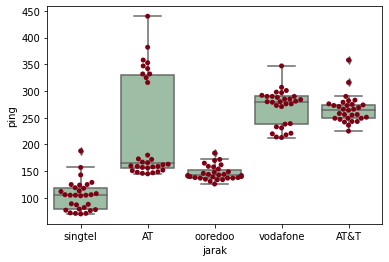

In [3]:
# Plot sebaran data

ax = sns.boxplot(x='jarak', y='ping', data=df, color='#99c2a2')
ax = sns.swarmplot(x='jarak', y='ping', data=df, color='#7d0013')
plt.show()

## Plot sebaran data berdasarkan faktor waktu

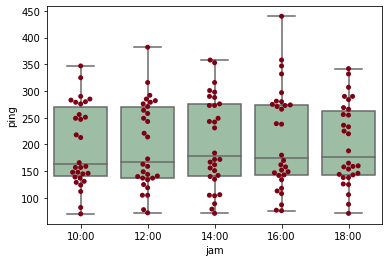

In [4]:
# Plot sebaran data

ax = sns.boxplot(x='jam', y='ping', data=df, color='#99c2a2')
ax = sns.swarmplot(x='jam', y='ping', data=df, color='#7d0013')
plt.show()

## Plot sebaran data berdasarkan faktor provider

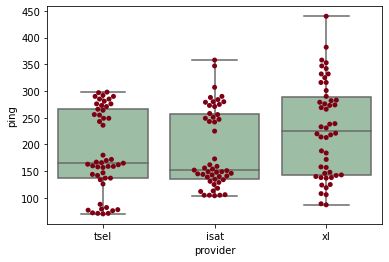

In [5]:
# Plot sebaran data

ax = sns.boxplot(x='provider', y='ping', data=df, color='#99c2a2')
ax = sns.swarmplot(x='provider', y='ping', data=df, color='#7d0013')
plt.show()

## 2. Operasi statistika dasar - Jarak

In [6]:
# Operasi statistika dasar

desc_jarak = df.groupby('jarak').describe()
desc_waktu = df.groupby('jam').describe()
desc_prov = df.groupby('provider').describe()

desc_jarak

ping                                                            
         count        mean        std    min     25%    50%     75%    max
jarak                                                                     
AT        30.0  223.233333  95.564993  145.0  156.25  164.5  330.25  440.0
AT&T      30.0  265.800000  25.384492  225.0  249.00  265.0  274.75  358.0
ooredoo   30.0  146.300000  13.519207  126.0  137.25  142.0  152.75  184.0
singtel   30.0  104.400000  27.734704   70.0   79.75  105.0  118.75  188.0
vodafone  30.0  269.900000  33.101047  213.0  238.25  280.0  290.00  347.0

## Operasi statistika dasar - Waktu

In [7]:
desc_waktu

ping                                                           
      count        mean        std   min     25%    50%     75%    max
jam                                                                   
10:00  30.0  198.300000  76.189034  70.0  140.50  162.5  271.00  347.0
12:00  30.0  197.100000  80.631281  72.0  137.00  168.0  269.25  382.0
14:00  30.0  204.200000  85.282654  71.0  140.50  178.0  275.25  358.0
16:00  30.0  209.566667  94.547081  76.0  142.25  175.0  274.75  440.0
18:00  30.0  200.466667  75.570352  71.0  143.25  176.5  263.50  342.0

## Operasi statistika dasar - Provider

In [8]:
desc_prov

ping                                                        
         count    mean        std    min     25%    50%     75%    max
provider                                                              
isat      50.0  191.52  73.558040  104.0  136.00  153.0  257.50  358.0
tsel      50.0  186.02  77.786072   70.0  137.00  165.5  265.50  298.0
xl        50.0  228.24  88.227110   87.0  143.75  226.0  288.25  440.0

## 3. Operasi ANOVA Multifactor

In [9]:
#fit multiple linear regression model
model = ols('ping ~ C(jarak) + C(jam) + C(provider) + C(jarak):C(jam) + C(jarak):C(provider) + C(jam):C(provider) +C(jarak):C(jam):C(provider)', data=df).fit()
sm.stats.anova_lm(model, typ=1)


,df,sum_sq,mean_sq,F,PR(>F)
C(jarak),4.0,652797.826667,163199.456667,491.475808,5.835626e-53
C(jam),4.0,3063.560000,765.890000,2.306481,6.588754e-02
C(provider),2.0,52685.613333,26342.806667,79.331466,3.109417e-19
C(jarak):C(jam),16.0,9043.973333,565.248333,1.702248,6.458392e-02
C(jarak):C(provider),8.0,236263.853333,29532.981667,88.938691,4.076254e-35
C(jam):C(provider),8.0,3780.120000,472.515000,1.422981,2.009716e-01
C(jarak):C(jam):C(provider),32.0,13174.746667,411.710833,1.239869,2.217343e-01
Residual,75.0,24904.500000,332.060000,NaN,NaN


### Faktor yang signifikan
1. Jarak
2. Provider
3. Interaksi Jarak x Provider


## 4. Plot residual dan model adequacy

### Legend Kategori Faktor
* Faktor Jarak :
    1. Singtel : 1
    2. Allied Telesis  : 2
    3. Ooredoo : 3
    4. Vodafone      : 4
    5. AT&T  : 5

* Faktor Waktu
    1. 10.00 : 1
    2. 12.00 : 2
    3. 14.00 : 3
    4. 16.00 : 4
    5. 18.00 : 5
* Faktor provider
    1. Telkomsel : 1
    2. Indosat : 2
    3. XL :3


__a. Faktor Jarak__

eval_env: 1


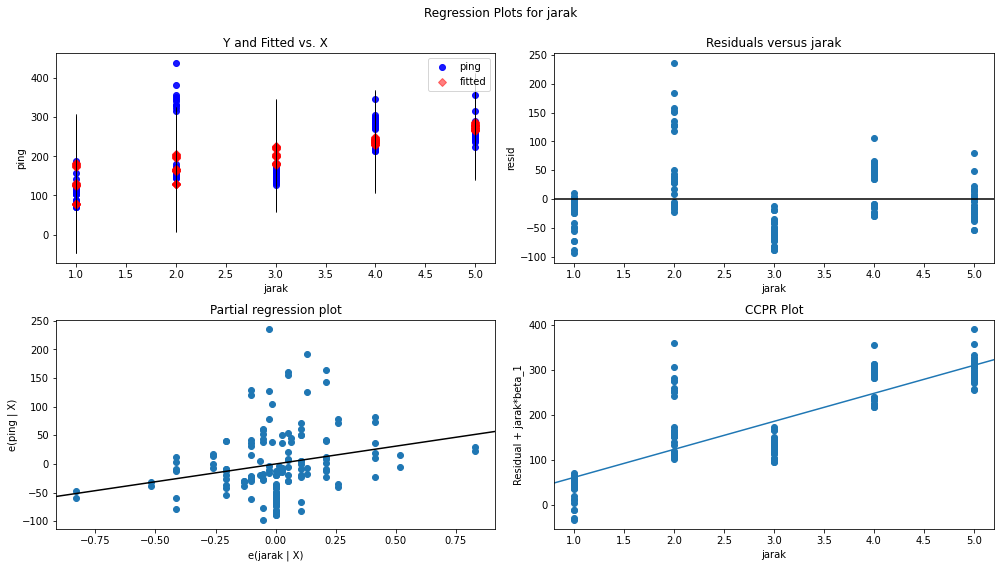

In [10]:
df = pd.read_csv('2022-05-14-DataStatlan-kat.csv')
df
model = ols('ping ~ jarak + jam + provider + jarak:jam + jarak:provider + jam:provider +jarak:jam:provider', data=df).fit()

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model, 'jarak', fig=fig)


__b. Faktor Waktu__

eval_env: 1


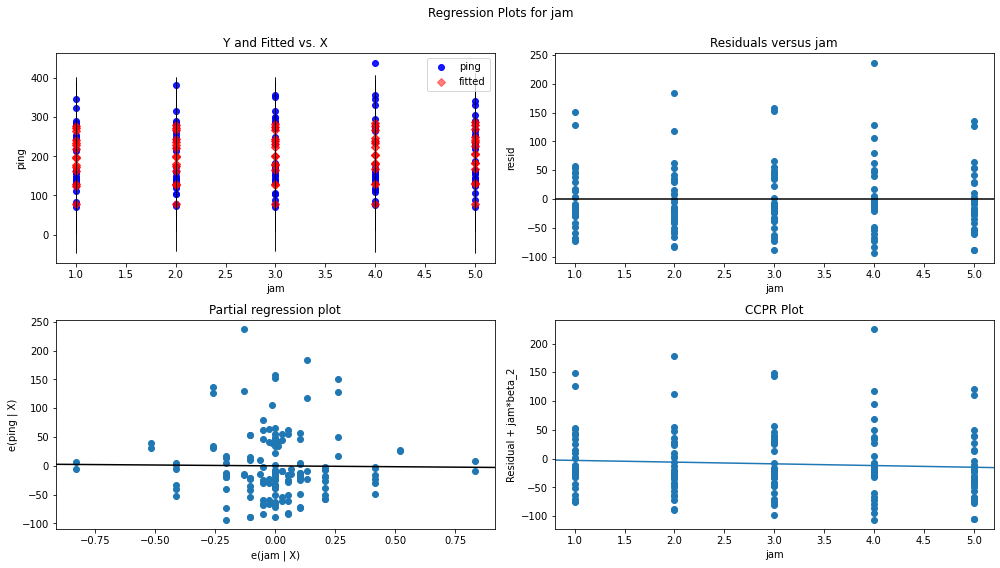

In [11]:
df = pd.read_csv('2022-05-14-DataStatlan-kat.csv')
df
model = ols('ping ~ jarak + jam + provider + jarak:jam + jarak:provider + jam:provider +jarak:jam:provider', data=df).fit()

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model, 'jam', fig=fig)


__c. Faktor Provider__

eval_env: 1


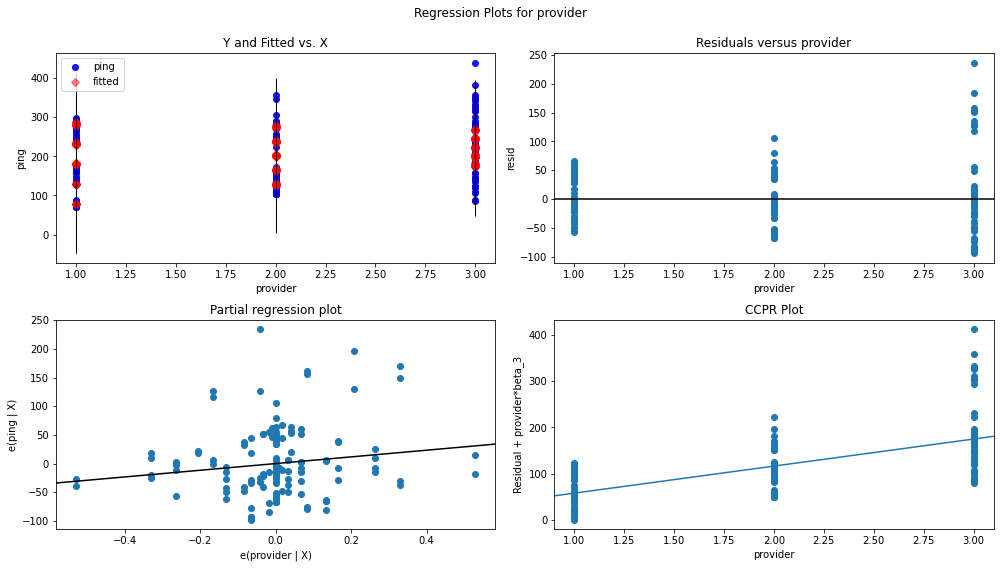

In [12]:
df = pd.read_csv('2022-05-14-DataStatlan-kat.csv')
df
model = ols('ping ~ jarak + jam + provider + jarak:jam + jarak:provider + jam:provider +jarak:jam:provider', data=df).fit()

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model, 'provider', fig=fig)


__d. Predicted Value__

In [13]:
df = pd.read_csv('2022-05-14-DataStatlan-kat.csv')
df
# Mencari model persamaan predicted
x = df[['jarak', 'jam', 'provider']]
y = df['ping']

# Train Dataset untuk mendapatkan model persamaan liniear multi variabel
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [14]:
#Fitting data training dengan model linier
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [15]:
# Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  54.36147332105759
Coefficients:


[('jarak', 40.57001038202678),
 ('jam', -2.0739504832351248),
 ('provider', 12.657223823848728)]

In [16]:
# Pencarian nilai prediksi
Intercept = mlr.intercept_
jam = -2.0739504832351248
jarak = 40.57001038202678
provider = 12.657223823848728
jam_input = df['jam']
jarak_input = df['jarak']
prov_input = df['provider']
ping_pred = Intercept + (jam*jam_input) + (jarak*jarak_input) + (provider*prov_input)
df['ping_pred'] = ping_pred
residual = df['ping']-df['ping_pred']
df['residual'] = residual
df

,jam,jarak,provider,ping,Unnamed: 4,ping_pred,residual
0,1,1,1,70,NaN,105.514757,-35.514757
1,1,1,1,82,NaN,105.514757,-23.514757
2,2,1,1,78,NaN,103.440807,-25.440807
3,2,1,1,72,NaN,103.440807,-31.440807
4,3,1,1,79,NaN,101.366856,-22.366856
...,...,...,...,...,...,...,...
145,3,5,3,290,NaN,288.961345,1.038655
146,4,5,3,273,NaN,286.887395,-13.887395
147,4,5,3,274,NaN,286.887395,-12.887395
148,5,5,3,266,NaN,284.813444,-18.813444


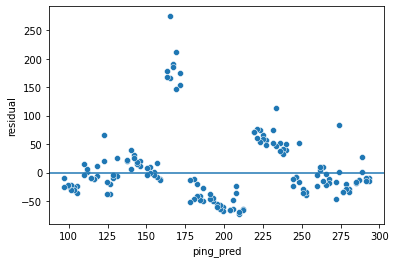

In [17]:
# Plot residual vs predicted
sns.scatterplot(data=df, x="ping_pred", y="residual")
plt.axhline(y=0)

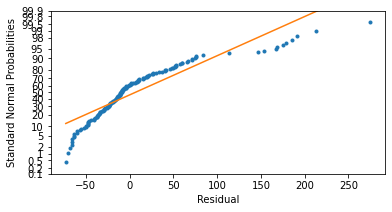

In [18]:
# Normal Probability plot of residual
fig, ax = plt.subplots(figsize=(6, 3))
common_opts = dict(
    probax='y',
    datalabel='Residual',
    bestfit = True,
    scatter_kws=dict(marker='.', linestyle='none')
)

fig = probscale.probplot(df['residual'], ax=ax, plottype='prob',
                         problabel='Standard Normal Probabilities', **common_opts)


## 5. Plot Interactional
__a. Interaksi Jam x Jarak__

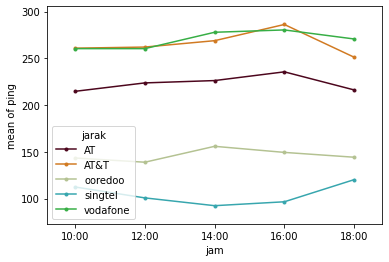

In [19]:
df = pd.read_csv('2022-05-14-DataStatlan.csv')
df
fig = interaction_plot(x=df['jam'], trace=df['jarak'], response=df['ping'], 
colors=['#4c061d','#d17a22', '#b4c292','#37a6ae','#37ae45'])
plt.show()

__b. Interaksi Jam x provider__

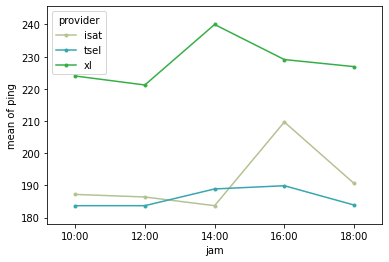

In [20]:
df = pd.read_csv('2022-05-14-DataStatlan.csv')
df
fig = interaction_plot(x=df['jam'], trace=df['provider'], response=df['ping'], 
colors=['#b4c292','#37a6ae','#37ae45'])
plt.show()

__c. Interaksi Jarak x provider__

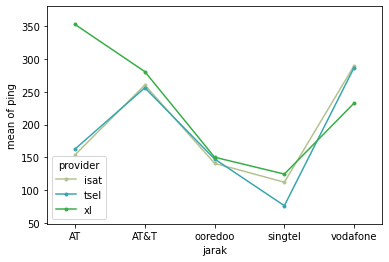

In [21]:
df = pd.read_csv('2022-05-14-DataStatlan.csv')
df
fig = interaction_plot(x=df['jarak'], trace=df['provider'], response=df['ping'], 
colors=['#b4c292','#37a6ae','#37ae45'])
plt.show()

# Case 2K Design of Experiment

## 1. Penentuan Min dan Max

Untuk penentuan minimum dan maksimum dari faktor yang digunakan akan mengikuti aturan berikut:
1. Jarak : 
    - Minimum : Singtel (890 km)
    - Maksimum : AT&T (16191 km)

2. Waktu :
    - Minimum : 10:00
    - Maksimum : 12:00
    
3. Provider :
    - Minimum : xl
    - Maksimum : tsel

## 2. Pengklasifikasi kategori

Kategori dibedakan sebagai berikut :
1. Jarak
    * 1 : AT&T
    * -1 : Singtel
2. Waktu
    * 1 : 18:00 
    * -1 : 10:00
3. Provider
    * 1: Telkomsel
    * -1 : XL

In [22]:
df = pd.read_csv('2022-05-14-DataStatlan-2k.csv')
df

,Run,Jarak,Jam,Provider,Replikasi 1,Replikasi 2,Sum
0,1,-1,-1,-1,157,124,281
1,2,-1,-1,1,70,82,152
2,3,-1,1,-1,143,188,331
3,4,-1,1,1,71,88,159
4,5,1,-1,-1,283,279,562
5,6,1,-1,1,256,249,505
6,7,1,1,-1,266,269,535
7,8,1,1,1,255,236,491


## 3. Operasi ANOVA 2K

In [27]:
# Function yang digunakan
def effect(n,const):
    eff = (1/(4*n))*const
    return eff

def ss(n,const):
    sums = (const**2)/(8*n)
    return sums

def PC(pc_x):
    calc = (pc_x/TSS)*100
    return calc

def ms(ss,dof):
    meansquare = ss/dof
    return meansquare

def fhit(ms,mse):
    fo = ms/mse
    return fo

def pvalue(f,dfn,dfd):
    p = 1-scipy.stats.f.cdf(f, dfn, dfd)
    return p

In [28]:
# Operasi Anova 2K
# n = Replikasi
n = 2

i = df['Sum'].iloc[0]
a = df['Sum'].iloc[4]
b = df['Sum'].iloc[2] 
c = df['Sum'].iloc[1]
ab = df['Sum'].iloc[6]
ac = df['Sum'].iloc[5]
bc = df['Sum'].iloc[3]
abc = df['Sum'].iloc[7]

df['rep_pow_1'] = df['Replikasi 1']**2
df['rep_pow_2'] = df['Replikasi 2']**2
df['sum2'] = df['Sum']**2

sum_rep_pow_1 = df['rep_pow_1'].sum()
sum_rep_pow_2 = df['rep_pow_2'].sum()


jml_baris = df['Sum'].sum()
jml_kolom1 = df['Replikasi 1'].sum()
jml_kolom2 = df['Replikasi 2'].sum()

# A = Jarak
# B = Jam
# C = Provider

# Persamaan
const_A = (a-i+ab-b+ac-c+abc-bc)
const_B = (b+ab+bc+abc-i-a-c-ac)
const_C = (c+ac+bc+abc-i-a-b-ab)
const_AB = (ab-a-b+i+abc-bc-ac+c)
const_AC = (i-a+b-ab-c+ac-bc+abc)
const_BC = (i+a-b-ab-c-ac+bc+abc)
const_ABC = (abc-bc-ac+c-ab+b+a-i)

# Perhitungan Main Effect
A = effect(2,const_A)
B = effect(2,const_B)
C = effect(2,const_C)
AB = effect(2,const_AB)
AC = effect(2,const_AC)
BC = effect(2,const_BC)
ABC = effect(2,const_ABC)

# Perhitungan Sum square
SS_A = ss(2,const_A)
SS_B = ss(2,const_B)
SS_C = ss(2,const_C)
SS_AB = ss(2,const_AB)
SS_AC = ss(2,const_AC)
SS_BC = ss(2,const_BC)
SS_ABC = ss(2,const_ABC)
SS_T = (sum_rep_pow_1+sum_rep_pow_2) - ((jml_baris**2)/(8*n))
TSS = SS_A+SS_B+SS_C+SS_AB+SS_AC+SS_BC+SS_ABC
SS_E = SS_T-(SS_A+SS_B+SS_C+SS_AB+SS_AC+SS_BC+SS_ABC)

# Perhitungan Sum Square
PC_A = PC(SS_A)
PC_B = PC(SS_B)
PC_C = PC(SS_C)
PC_AB = PC(SS_AB)
PC_AC = PC(SS_AC)
PC_BC = PC(SS_BC)
PC_ABC = PC(SS_ABC)

# Perhitungan mean square
MS_A = ms(SS_A,1)
MS_B = ms(SS_B,1)
MS_C = ms(SS_C,1)
MS_AB = ms(SS_AB,1)
MS_AC = ms(SS_AC,1)
MS_BC = ms(SS_BC,1)
MS_ABC = ms(SS_ABC,1)
MS_E = ms(SS_E,8)

# Perhitungan F hitung
f_A = fhit(MS_A,MS_E)
f_B = fhit(MS_B,MS_E)
f_C = fhit(MS_C,MS_E)
f_AB = fhit(MS_AB,MS_E)
f_AC = fhit(MS_AC,MS_E)
f_BC = fhit(MS_BC,MS_E)
f_ABC = fhit(MS_ABC,MS_E)

# P-Value Calc
p_A = pvalue(f_A,1,8)
p_B = pvalue(f_B,1,8)
p_C = pvalue(f_C,1,8)
p_AB = pvalue(f_AB,1,8)
p_AC = pvalue(f_AC,1,8)
p_ABC = pvalue(f_ABC,1,8)

In [29]:
# Data Effect
data_e = [['Jarak (A)',A,SS_A,PC_A],
         ['Jam (B)',B,SS_B,PC_B],
         ['Provider (C)',C,SS_C,PC_C],
         ['AB',AB,SS_AB,PC_AB],
         ['AC',AC,SS_AC,PC_AC],
         ['BC',BC,SS_BC,PC_BC],
         ['ABC',ABC,SS_ABC,PC_ABC]]
dfe = pd.DataFrame(data_e, columns = ['Factor','Effect Estimate','Sum of Squares','Percent Contribution'])
dfe

,Factor,Effect Estimate,Sum of Squares,Percent Contribution
0,Jarak (A),146.25,85556.25,86.398637
1,Jam (B),2.00,16.00,0.016158
2,Provider (C),-50.25,10100.25,10.199697
3,AB,-12.25,600.25,0.606160
4,AC,25.00,2500.00,2.524615
5,BC,-3.75,56.25,0.056804
6,ABC,7.00,196.00,0.197930


In [30]:
# Data Olah 
data_o = [['Jarak (A)',SS_A,MS_A,f_A,p_A],
         ['Jam (B)',SS_B,MS_B,f_B,p_B],
         ['Provider (C)',SS_C,MS_C,f_C,p_C],
         ['AB',SS_AB,MS_AB,f_AB,p_AB],
         ['AC',SS_AC,MS_AC,f_AC,p_AC],
         ['ABC',SS_ABC,MS_ABC,f_ABC,p_ABC]]
dfo = pd.DataFrame(data_o, columns = ['Source of Variation','Sum of Squares','Mean Square','F0','p-value'])
dfo

,Source of Variation,Sum of Squares,Mean Square,F0,p-value
0,Jarak (A),85556.25,85556.25,343.771974,7.381803e-08
1,Jam (B),16.00,16.00,0.064289,8.062352e-01
2,Provider (C),10100.25,10100.25,40.583626,2.158160e-04
3,AB,600.25,600.25,2.411853,1.590234e-01
4,AC,2500.00,2500.00,10.045203,1.320624e-02
5,ABC,196.00,196.00,0.787544,4.007359e-01
